<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Classifiers---Part-Six" data-toc-modified-id="Image-Classifiers---Part-Six-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Classifiers - Part Six</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#Install-TensorFlow-and-Keras" data-toc-modified-id="Install-TensorFlow-and-Keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install TensorFlow and Keras</a></span></li><li><span><a href="#Develop-the-model" data-toc-modified-id="Develop-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Develop the model</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-data-sets" data-toc-modified-id="Import-libraries-and-data-sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Import libraries and data sets</a></span></li><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Extract-images-from-archive" data-toc-modified-id="Extract-images-from-archive-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extract images from archive</a></span></li><li><span><a href="#Build-and-compile-the-model" data-toc-modified-id="Build-and-compile-the-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Build and compile the model</a></span></li><li><span><a href="#Model-Summary" data-toc-modified-id="Model-Summary-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model Summary</a></span></li><li><span><a href="#Load-the-image-data" data-toc-modified-id="Load-the-image-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Load the image data</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Examine-the-training-results" data-toc-modified-id="Examine-the-training-results-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Examine the training results</a></span></li><li><span><a href="#Make-predictions-and-gauge-test-set-accuracy" data-toc-modified-id="Make-predictions-and-gauge-test-set-accuracy-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Make predictions and gauge test set accuracy</a></span></li><li><span><a href="#Examine-misclassifications" data-toc-modified-id="Examine-misclassifications-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Examine misclassifications</a></span></li></ul></li></ul></div>

<h1 style="text-align: center;">Image Classifiers - Part Six</h1>

## Introduction

<img style="float: left; margin-right: 25px;" src="images/catMonocle.jpg" />

The overall goal of this series of write-ups is to explore a number of models performing binary classification on a given set of images.  In this sixth write-up we move from creating models from scratch to utilizing the TensorFlow framework.  

The goal of this write-up is to emulate what we've done in the [most recent from scratch model](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/keras/Machine-Learning/Python/03-ComputerVision-Classification/Classification-04.ipynb) utilizing TensorFlow, achieve at least the same performance and results as we had before, and pave the way to continue work in TensorFlow and Keras.  The end result should be a convolutional neural network (CNN) in Keras that that will serve as our baseline.

So, let's get started!

# Install TensorFlow and Keras

We'll quickly install TensorFlow and Keras using pip:

```bash
pip install tensorflow
pip install keras

```

Everything is so hard in Python...   /s 



# Develop the model

## Import libraries and data sets

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
np.random.seed(10)

import random 
random.seed(10)

from os import path
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import inspect
import time
import copy
import h5py
import math
import keras

from utils import *

In [6]:
# Import the libs we need from Keras to build our convolutional neural network (CNN)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Inspect the data

*** KEYS
HDF5 container keys: ['testData', 'testLabels', 'trainData', 'trainLabels']

*** LABELS
Total number of training labels: 800
Number of cat labels: 396
Number of object labels: 404
First 10 training labels: [0 0 1 1 1 1 1 1 0]


Total number of testing labels: 200
Number of cat labels: 104
Number of object labels: 96
First 10 testing labels: [1 1 0 0 1 1 0 0 0]


*** IMAGE DATA
Image data shape in archive: (800, 64, 64, 3)


First HDF5 container dataSet item shape: (64, 64, 3)
Image data shape after flattening: (192, 64)
First 10 dataSet item matrix values: []


Recreating and showing first 20 images from flattened matrix values:



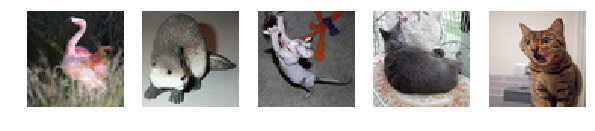

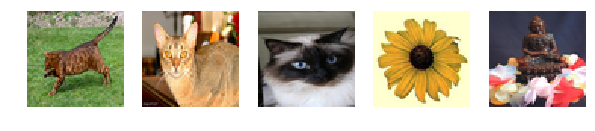

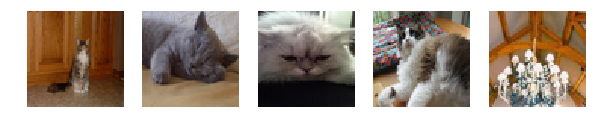

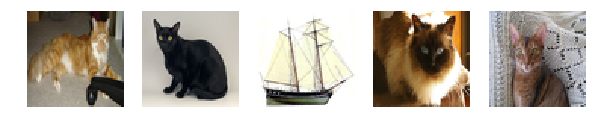

In [7]:
# Examine the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")
validateArchive(imageData)

## Extract images from archive

One of the nice things about Keras is we can utilize `datagen.flow_from_directory` to have our dataset images loaded and labeled automaticly.  This means we don't need to work with the HDF5 archive as we have in previous write-ups.  What we do need to do; however, is write the images to disk, so that this write-up uses the same data as previous write-ups.

There is a quick script to do that here:  [ExtractImagesFromHDF5.ipynb](./ExtractImagesFromHDF5.ipynb)

In [12]:
# Define the image shapes
imgWidth, imgHeight = 64, 64
inputShape = (imgWidth, imgHeight, 3)

## Build and compile the model

In [13]:
# Create a sequential model object
model = Sequential()

# **First conv layer**
# Filters: 32
# Kernel: 3x3 (9px)
model.add(Conv2D(32, (3, 3), input_shape=inputShape))
model.add(Activation('relu'))
# Max pool
# Size: 2x2 (combine 4px to 1)
model.add(MaxPooling2D(pool_size=(2, 2)))


# **Second conv layer**
# Filters: 32
# Kernel: 3x3 (9px)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Max pool
# Size: 2x2 (combine 4px to 1)
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Third conv layer**
# Filters: 64
# Kernel: 3x3 (9px)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# Max pool
# Size: 2x2 (combine 4px to 1)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten 
model.add(Flatten())

# Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [32]:
# Compile the model utilizing Adam as per previous write-ups
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Summary

In [15]:
# Display model summar
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

## Load the image data

This in my opinion is where we really get spoiled.  Keras allows us to build `ImageDataGenerator` objects that do all the hard work for us.  The `ImageDataGenerator` finds all the images in a given directory, loads them, creates the labels, performs image augmentation, and so on and so forth.  Compared to all the work we had to do to build our own image set from scratch this is a breeze.

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# For the training set we want all sorts of augmentations
datagen = ImageDataGenerator(
        rotation_range=40,       # Rotate up to 40 degrees
        width_shift_range=0.2,   # Shift width by max 20%
        height_shift_range=0.2,  # Shift height by max 20%
        rescale=1./255,          # Normalize
        shear_range=0.2,         # Cut away max 20% of the image
        zoom_range=0.2,          # Zoom in 20% max
        horizontal_flip=True,    # Flip image randomly
        fill_mode='nearest')     # Fill missing pixels with the nearest value

In [17]:
# For the validation set we only want to normalize
validation_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Only normalize for the test set too
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
# Define mini-batch size
batch_size = 16

# Setup the training generator
train_generator = datagen.flow_from_directory(
        './datasets/catData/train', 
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.


In [35]:
# Setup the validation generator
validation_generator = validation_datagen.flow_from_directory(
        './datasets/catData/validation',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 100 images belonging to 2 classes.


In [36]:
# Setup the test generator
test_generator = test_datagen.flow_from_directory(
        './datasets/catData/test',
        target_size=(64, 64),
        batch_size=1,
        shuffle=False,
        class_mode='binary')

Found 100 images belonging to 2 classes.


## Train the model

In [37]:
# Do all the hard work of training the model using the training data
history = model.fit_generator(
        train_generator,
        steps_per_epoch=6000 // batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=1000 // batch_size
)

Epoch 1/3
375/375 [==============================] - 149s 398ms/step - loss: 0.4686 - acc: 0.7715 - val_loss: 0.3742 - val_acc: 0.8300
Epoch 2/3
375/375 [==============================] - 145s 387ms/step - loss: 0.4516 - acc: 0.7890 - val_loss: 0.4617 - val_acc: 0.7900
Epoch 3/3
375/375 [==============================] - 148s 394ms/step - loss: 0.4170 - acc: 0.8032 - val_loss: 0.3409 - val_acc: 0.8600


## Examine the training results

Let's examine how the model's accuracy improved as we trained it:

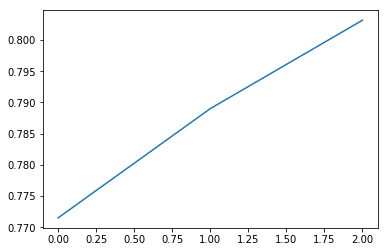

In [38]:
plt.plot(history.history['acc'])

<br><br>
And how about the cost:

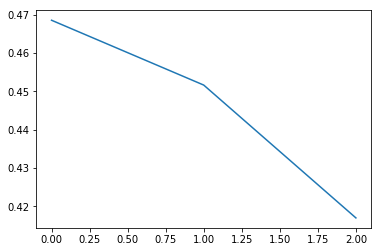

In [39]:
plt.plot(history.history['loss'])

<br><br>
The final accuracy rate on the training data set:

In [40]:
model.evaluate_generator(generator=validation_generator)

[0.3408663201332092, 0.86]

## Make predictions and gauge test set accuracy

In [47]:
# Reset the test generator in case we want to run it multiple times
test_generator.reset()

# Run the test data through the forward propogation of the model
pred=model.predict_generator(test_generator,verbose=1)

100/100 [==============================] - 0s 4ms/step


In [48]:
# Output results
model.evaluate_generator(generator=test_generator)

[0.3773117420016747, 0.84]

84%!  Definitely the best results we so far throughout this series of write-ups.

Let's examine the predictions and misclassifications:

## Examine misclassifications

In [50]:
# Print predicted vs actual labels
predicted_class_indices = np.zeros(len(pred), dtype=int)
predicted_class_indices[np.squeeze(pred > 0.5)] = 1
print("Predicted labels:  ", predicted_class_indices)
print("Actual labels   :  ", test_generator.classes)

Predicted labels:   [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual labels   :   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [51]:
# Examine the classification labels assigned by Keras
classIndicesRev = {v:k for k,v in train_generator.class_indices.items()}
print(classIndicesRev)

{0: 'cat', 1: 'obj'}


In [60]:
# Sanity check
assert(len(predicted_class_indices) == len(test_generator.classes))

# Create the labels for the images we'll plot below
wrong = []
labels = []

for i, val in enumerate(predicted_class_indices):
    if (predicted_class_indices[i] != test_generator.classes[i]):
        wrong.append('.\\datasets\\catData\\test\\' + test_generator.filenames[i])
        txt = "{}{}".format("Predicted: ", classIndicesRev[predicted_class_indices[i]])
        txt = "{}{}{}".format(txt, "\nActual: ", classIndicesRev[test_generator.classes[i]])
        txt = "{}{}{}".format(txt, "\nImage file: ", test_generator.filenames[i])
        labels.append(txt)   

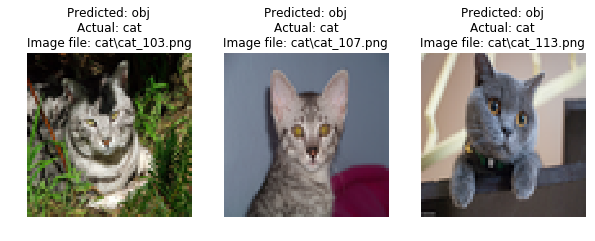

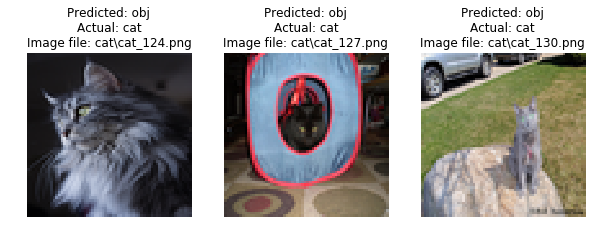

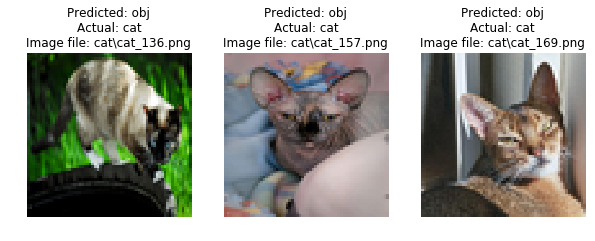

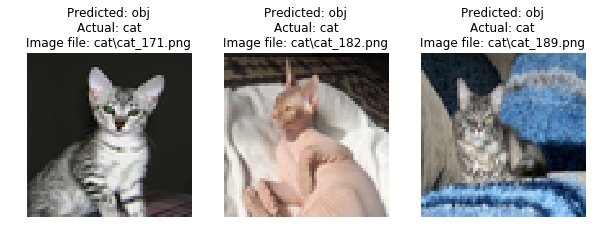

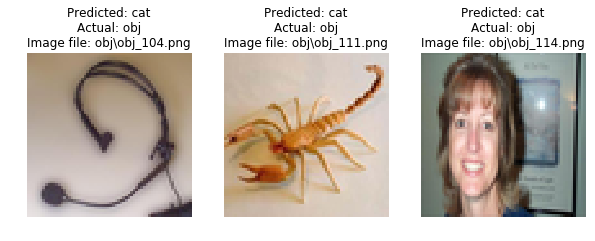

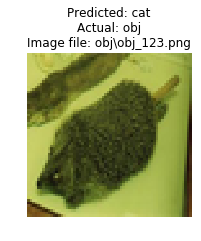

In [68]:
# Examine the missclassified images
images = []

for i, img in enumerate(wrong):
    img = mpimg.imread(img)
    images.append(img)
    #imgplot = plt.imshow(img)    
    #plt.xlabel(label[i])
    #plt.show()

grid_display(images, labels, 3, (10,10))

I think my favorite miss-classified images are of the scorpion and the headphones...  Not sure what the model is thinking there at all.  ;)